# `Matplolib fundamentals`

In [1]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")

df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


## `Exploratory data analysis - EDA`

In [2]:
df.shape # long table

(4377, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [4]:
df.describe()

,Year,Month,Quantity,Pct
count,4377.000000,4377.000000,4377.000000,4377.000000
mean,2011.421065,6.459904,307.802148,2.762257
std,2.906408,3.446815,411.315021,3.635185
min,2007.000000,1.000000,1.000000,0.000000
25%,2009.000000,3.000000,14.000000,0.100000
50%,2011.000000,6.000000,153.000000,1.400000
75%,2014.000000,9.000000,461.000000,4.200000
max,2017.000000,12.000000,3017.000000,22.700000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4377.0,2011.421065,2.906408,2007.0,2009.0,2011.0,2014.0,2017.0
Month,4377.0,6.459904,3.446815,1.0,3.0,6.0,9.0,12.0
Quantity,4377.0,307.802148,411.315021,1.0,14.0,153.0,461.0,3017.0
Pct,4377.0,2.762257,3.635185,0.0,0.1,1.4,4.2,22.7


In [6]:
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [7]:
df.tail()

,Year,Month,Make,Quantity,Pct
4372,2017,1,Nilsson,3,0.0
4373,2017,1,Maserati,2,0.0
4374,2017,1,Ferrari,1,0.0
4375,2017,1,Smart,1,0.0
4376,2017,1,Ssangyong,1,0.0


In [8]:
import duckdb

df_quantity_brand = duckdb.query(
    '''--sql
    SELECT
        make as Brand,
        SUM(quantity) AS Quantity
    FROM df
    GROUP BY 
        Brand
    ORDER BY 
        Quantity
    DESC
''').df()

df_quantity_brand.head()

,Brand,Quantity
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0


### `Bar chart`

In [9]:
df_quantity_brand.plot

<Axes: xlabel='Brand'>

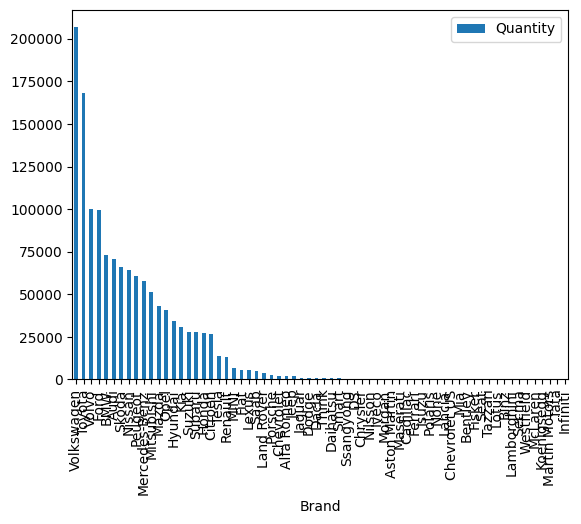

In [10]:
df_quantity_brand.plot(kind ='bar', x = "Brand", y = "Quantity")

### `plot top 5 most popular brands`

<Axes: xlabel='Brand'>

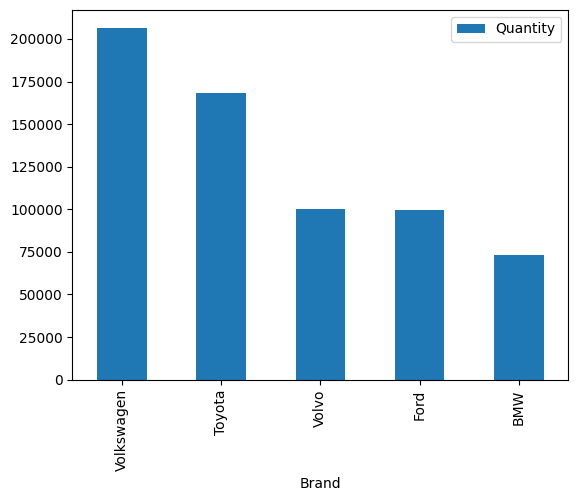

In [11]:
df_quantity_brand.head().plot(kind = 'bar', x = 'Brand', y = 'Quantity')

<Axes: xlabel='Brand'>

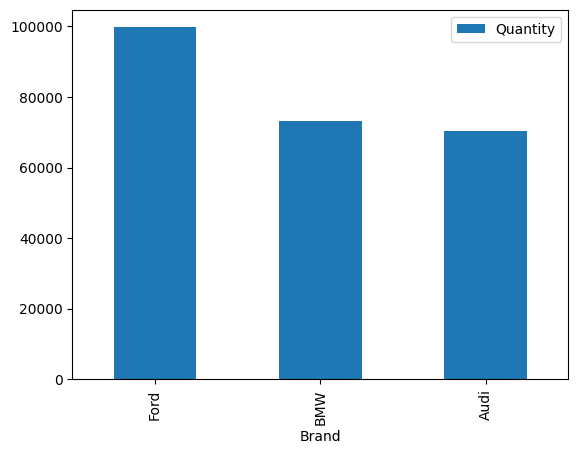

In [12]:
df_quantity_brand.iloc[3:6].plot(kind = 'bar', x = 'Brand', y = 'Quantity')

## `Matplotlib bar`

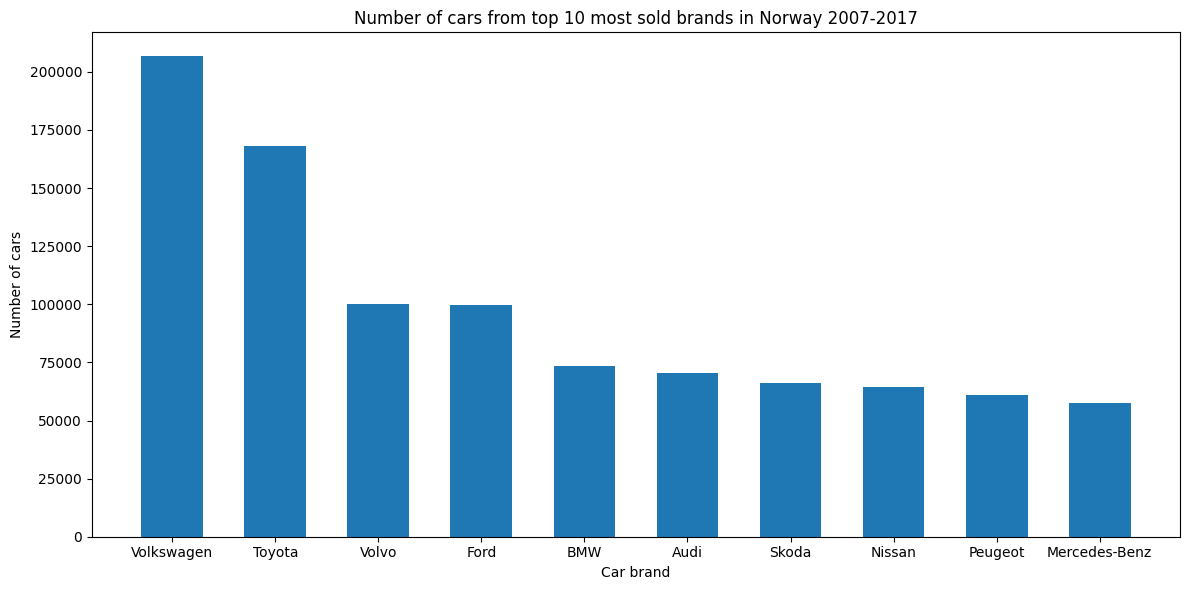

In [13]:
import matplotlib.pyplot as plt

df_quantity_brand_top10 = df_quantity_brand.iloc[:10]

fig, ax= plt.subplots(figsize=(12,6))

ax.bar(
    x=df_quantity_brand_top10['Brand'],
    height=df_quantity_brand_top10['Quantity'],
    width=0.6,
)

ax.set(
    title="Number of cars from top 10 most sold brands in Norway 2007-2017",
    xlabel="Car brand",
    ylabel="Number of cars",
)

fig.tight_layout()

fig.savefig('figures/bars_top10_cars.png')

### `Line chart`

In [14]:
df_quantity_year = duckdb.query(
"""--sql
select year, sum (quantity) as Quantity
from df
group by year
order by year
"""
).df().set_index("Year")

df_quantity_year

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


In [15]:
df.tail()

,Year,Month,Make,Quantity,Pct
4372,2017,1,Nilsson,3,0.0
4373,2017,1,Maserati,2,0.0
4374,2017,1,Ferrari,1,0.0
4375,2017,1,Smart,1,0.0
4376,2017,1,Ssangyong,1,0.0


<Axes: xlabel='Year'>

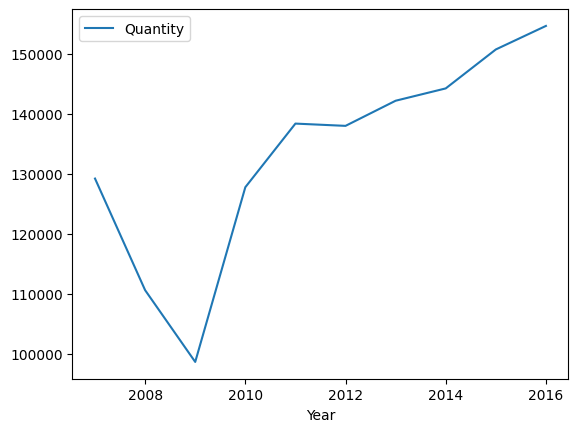

In [16]:
df_quantity_year.iloc[:-1].plot()

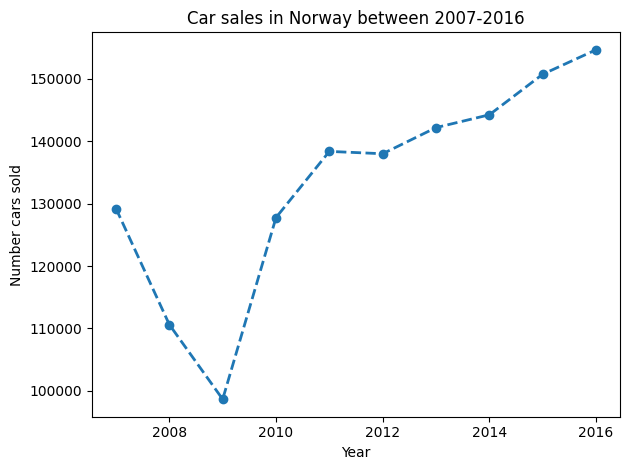

In [17]:
ax = df_quantity_year.iloc[:-1].plot(
    title="Car sales in Norway between 2007-2016",
    xlabel="Year",
    ylabel="Number cars sold",
    style="--o",
    linewidth=2,
)

ax.legend().remove()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig('figures/car_sales_yearly_line.png')